<a href="https://colab.research.google.com/github/Kiem-cmd/ML-from-Scratch/blob/main/Regularization_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h> REGULARIZATION  ✋</h> 

Một vấn đề chung trong học máy là làm thế nào để mô hình hoạt động tốt trên cả train_data và test_data

  ->    Các cách để giải quyết vấn đề này được gọi chung là Regulazation 

---









 Với DL , Regulazation dựa trên sự cân bằng của variance(giảm) và bias(tăng)
*   Mô hình quá sai - bias cao - underfiting
*   Mô hình phù hợp với data  - True
*   Mô hình quá đúng - variance cao - overfitting


---



---





<strong> Parameter Norm Penalties </strong>

Nhiều cách tiếp cận <strong>Regulazation</strong> dựa trên việc giới hạn độ phức tạp của mô hình bằng cách thêm một lượng hình phạt(penalties) vào hàm loss J()

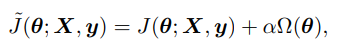


Alpha là hyperparameter 
*   Nếu alpha > 0 : No regulazrization
*   Nếu alpha >> : More regularization










---
* Đối với Neural Network, thường chọn sử dụng penalties các *w* chứ không regualarization *b*

Bởi vì các *b* thường chỉ ảnh hưởng tới một biến duy nhất và ko tạo quá nhiều variance và việc regularization nó có thể tạo ra underfitting


*  Có thể dùng mỗi một alpha khác nhau cho mỗi layer





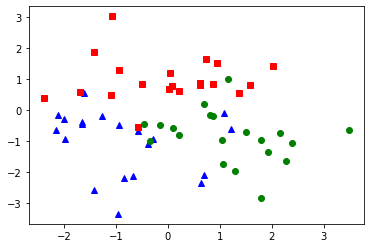

In [3]:
import math 
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(4)

means = [[-1,-1],[1,-1],[0,1]]
cov=[[1,0],[0,1]]

N=20 

X0 = np.random.multivariate_normal(means[0],cov,N)
X1 = np.random.multivariate_normal(means[1],cov,N)
X2 = np.random.multivariate_normal(means[2],cov,N)

X = np.concatenate((X0,X1,X2),axis  = 0)
K = 3
label = np.asarray([0]*N + [1] * N + [2] * N).T
def k_mean(X,label):
  K = np.amax(label) + 1
  X0 = X[label == 0,:]
  X1 = X[label == 1,:]
  X2 = X[label == 2,:]

  plt.plot(X0[:,0],X0[:,1],'^b')
  plt.plot(X1[:,0],X1[:,1],'go')
  plt.plot(X2[:,0],X2[:,1],'rs')

  plt.plot()
k_mean(X,label)
plt.show()





---





 **1. L2 Parameter Regularization - Weight Decay ( Tiêu biến trọng số)**
 
 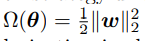




---
- Cách này sẽ đẩy weight về gần với 0 hơn bởi thêm phần penalties(ở bên trên) vào J() 


Xét một bài toán Linear Regression : the cost funtion is *squared error*

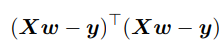    =>> 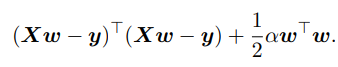

và Normal Equation for solution :

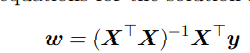  ==> 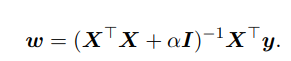

 Có thể thế ma trận hiệp phương sai ( đại diện cho variance) của phương trình 2 đã thêm alpha so với phương trình 1  --> điều này làm mo hình thu nhỏ weight 



---

Hiểu nôm na khi thêm penalties thì khi optimize J() các weight phải nhỏ ~ 0 --> hạn chế được overfitting

In [12]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) 


[0.25 0.25 0.25 0.25]


In [13]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [14]:
def cost_function(Y,y_pred,w1,w2,alpha):
  cost = -np.sum(Y*np.log(y_pred))/Y.shape[1]
  penalties = alpha*(np.linalg.norm(w1)**2 + np.linalg.norm(w2)**2)

  return cost + penalties


In [19]:
d0 = 2
d1 = 100
d2 = 3
def neural_network(alpha):
  # init parameter random
  w1 = 0.01*np.random.randn(d0,d1)     
  b1 = np.zeros((d1,1))
  w2 = 0.01*np.random.randn(d1,d2)
  b2 = np.zeros((d2,1))

  Y = lb.fit_transform(label)
  N = X.shape[1]

  lr = 1

  for i in range(10000):

    Z1 = np.dot(w1.T,X) + b1
    A1 = np.maximum(Z1,0)
    Z2 = np.dot(w2.T,A1) + b2
    y_pred = softmax(Z2)

    if (i%1000) == 0:
      loss = cost(Y,y_pred,w1,w2,alpha)
      print(f"Iter:{i} - loss: {loss}")

    E2 = (y_pred - Y)/N
    dw2 = np.dot(A1,E2.T) + alpha*w2
    db2 = np.sum(E2,axis = 1, keepdims = True)
    E1 = np.dot(w2,E2)
    E1[Z1<=0] = 0
    dw1 = np.dot(X,E1.T) + alpha*w1
    db1 = np.sum(E1,axis = 1, keepdims = True)

    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2

    return (w1,w2,b1,b2)



In [20]:
neural_network(0.01)

ValueError: ignored